## Second Analysis
#### Temporal Analysis:
Explore trends over time, e.g., the number of incidents opened/closed over days or months.
Analyze the average resolution time of incidents over time.

#### Category Analysis:
Explore the most common incident categories and subcategories.
Analyze the average resolution time by category or subcategory.

#### Location Analysis:
Identify locations with the highest number of incidents.
Examine if certain locations have a higher rate of specific incident categories.

#### Analysis by User or Group:
Identify the most active users in terms of incident reporting (using the opened_by column).
Explore which assignment groups handle the most incidents.

#### Resolution Analysis:
Explore the most common resolution codes (closed_code column).
Identify any trends or patterns in how incidents are resolved.

## Temporal analysis
For the first part of the temporal analysis, we'll visualize the number of incidents opened and closed over time.

In [5]:
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [18]:
#write a regex to check all the data formats in opened_at columns
col = 'opened_at'
result = data[col].str.contains(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}').all()
#print the date format checked

if result:
    #precise the date format checked
    print('All the data in {} column is in the correct format'.format(col))
else:
    #number of samples that are not in the correct format
    nbr = len(data[~data[col].str.contains(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}')])
    print('Not all the data in {} column is in the correct format, there are {} samples that are not in the correct format'.format(col, nbr))

Not all the data in opened_at column is in the correct format, there are 141712 samples that are not in the correct format


In [20]:
#identify the data in different format
data[~data[col].str.contains(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}')][col].unique()

array(['29/2/2016 01:16', '29/2/2016 04:40', '29/2/2016 06:10', ...,
       '15/2/2017 11:58', '16/2/2017 09:09', '16/2/2017 14:17'],
      dtype=object)

In [24]:
# we've wrote a custom function to convert the data in the correct format and put it in utilspro.py

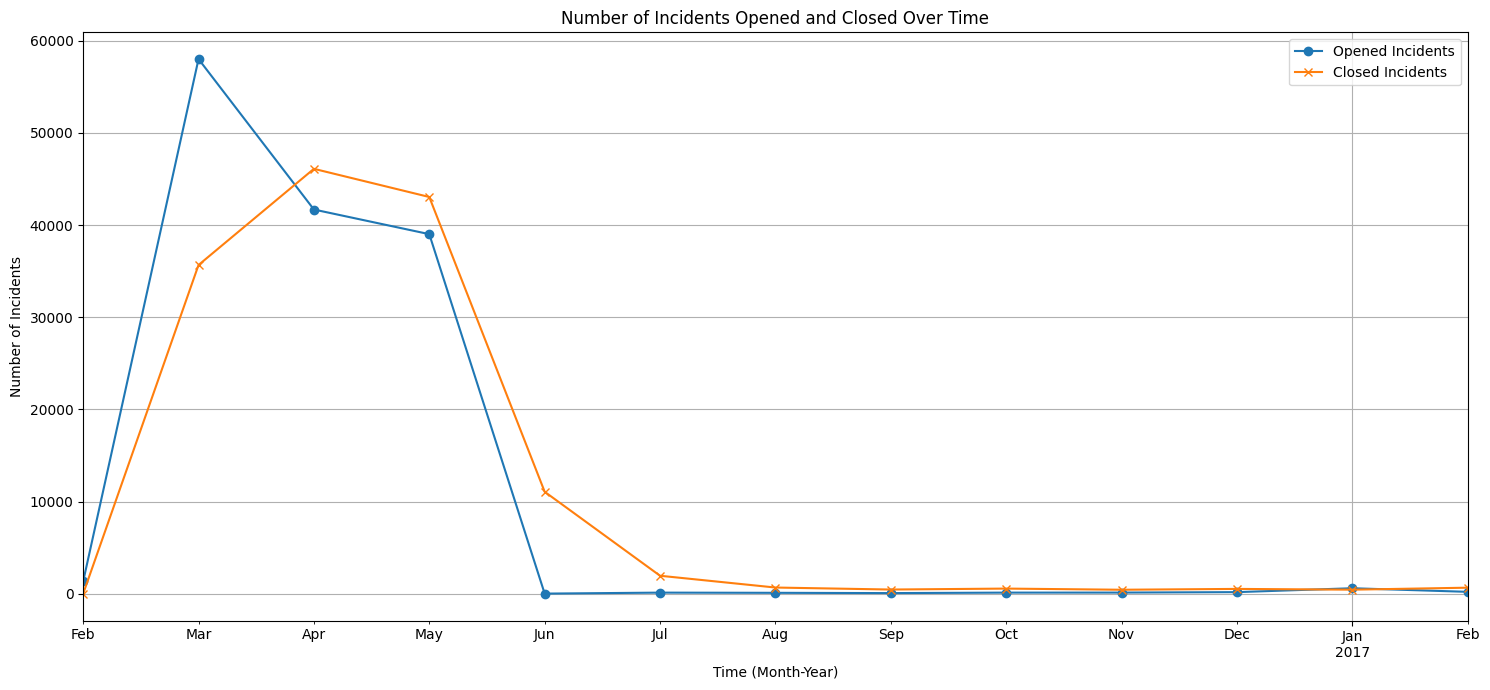

In [23]:
%run utilspro.py
data = pd.read_csv(dataset_path)
# change the type of the 'opened_at' and 'closed_at' columns to datetime using custom date parser 
data['opened_at'] = data['opened_at'].apply(custom_date_parser)
data['closed_at'] = data['closed_at'].apply(custom_date_parser)
# Extracting month and year from the 'opened_at' and 'closed_at' columns for aggregation
data['opened_month_year'] = data['opened_at'].dt.to_period('M')
data['closed_month_year'] = data['closed_at'].dt.to_period('M')

# Grouping by month-year and counting the number of incidents opened and closed
opened_counts = data.groupby('opened_month_year').size()
closed_counts = data.groupby('closed_month_year').size()

# Plotting the trends over time
plt.figure(figsize=(15, 7))
opened_counts.plot(label='Opened Incidents', marker='o')
closed_counts.plot(label='Closed Incidents', marker='x')
plt.title('Number of Incidents Opened and Closed Over Time')
plt.xlabel('Time (Month-Year)')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()